In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [3]:
features= np.array(df.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [4]:
labels= df.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
X=df.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2


In [6]:
y=df.iloc[:,-1:]
y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
#X = scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)
#30

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(features)

C:\Users\JYOTIKA\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [10]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(features, y_pred, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=4, min_samples_leaf=5)
clf_gini.fit(X1_train, y1_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [12]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 4, min_samples_leaf = 5)
clf_entropy.fit(X1_train, y1_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [13]:
def prediction(features, clf_object):
    y_pred = clf_object.predict(features)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [14]:
def cal_accuracy(labels, y_pred):
    print ("Accuracy : ", accuracy_score(labels,y_pred)*100) 

In [15]:
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(features, clf_gini)
cal_accuracy(labels, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(features, clf_entropy)
cal_accuracy(labels, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 1 0 1]
Accuracy :  80.19801980198021
Results Using Entropy:
Predicted values:
[0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0

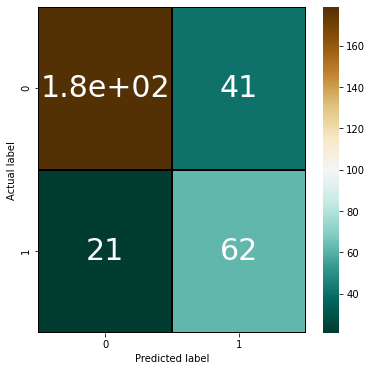

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(labels, y_pred_entropy)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.7953795379537953
Sensitivity for the hybrid model: 0.895
Specificity for the hybrid model: 0.6019417475728155
Precision for the hybrid model: 0.8136363636363636
